In [1]:
import tensorflow as tf

In [2]:
with tf.compat.v1.Session() as sess:
    hello = tf.constant('Hello world!')
    print(sess.run(hello))

b'Hello world!'


In [3]:
a = tf.constant(2)
b = tf.constant(3)

c = tf.constant([1, 2, 3, 4])
d = tf.constant([2, 3, 4, 5])

In [4]:
with tf.compat.v1.Session() as sess:
    a = tf.constant(2)
    b = tf.constant(3)
    c = tf.constant([1, 2, 3, 4])
    d = tf.constant([2, 3, 4, 5])
    print('a = {}, b = {}, c = {}, d = {}\n'.format(sess.run(a), sess.run(b), sess.run(c), sess.run(d)))
    
    print('a + b = {}\n'
          'a * b = {}'.format(sess.run(a + b), sess.run(a * b)))
    
    print('c + d = {}\n'
          'c * d = {}'.format(sess.run(c + d), sess.run(c * d)))

a = 2, b = 3, c = [1 2 3 4], d = [2 3 4 5]

a + b = 5
a * b = 6
c + d = [3 5 7 9]
c * d = [ 2  6 12 20]


In [5]:
with tf.compat.v1.Session() as sess:
    a = tf.compat.v1.placeholder(tf.int16)
    b = tf.compat.v1.placeholder(tf.int16)

    add = tf.add(a, b)
    mul = tf.multiply(a, b)
    
    writer = tf.compat.v1.summary.FileWriter('logs', sess.graph)
    
    print('a + b = {}'.format(sess.run(add, feed_dict={a: 3, b: 1})))
    print('a * b = {}'.format(sess.run(mul, feed_dict={a: 7, b: 8})))

a + b = 4
a * b = 56


In [6]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [7]:
from sklearn.datasets import make_regression

n_samples = 42

x_train, y_train = make_regression(n_samples=n_samples, n_features=1, noise=15, random_state=7)
x_train = (x_train - x_train.mean())/x_train.std()
y_train = (y_train - y_train.mean())/y_train.std()

In [8]:
print(x_train[:5])

[[ 0.03264883]
 [ 2.00453732]
 [-0.09529635]
 [-0.29220736]
 [ 0.19354651]]


Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Epoch #0: cost = 44.78180694580078
Epoch #100: cost = 67.63247680664062
Epoch #200: cost = 67.4620361328125
Epoch #300: cost = 67.38157653808594
Epoch #400: cost = 67.34589385986328
Epoch #500: cost = 67.32942962646484
Epoch #600: cost = 67.32154083251953
Epoch #700: cost = 67.31766510009766
Epoch #800: cost = 67.31455993652344
Epoch #900: cost = 67.31415557861328


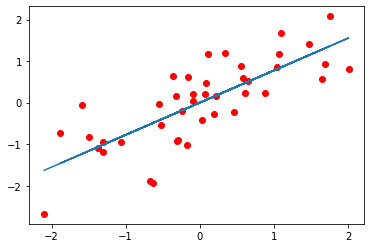

In [9]:
with tf.compat.v1.Session() as sess:
    X = tf.compat.v1.placeholder('float')
    Y = tf.compat.v1.placeholder('float')

    W = tf.compat.v1.Variable(np.random.randn(), name = 'weight')
    b = tf.compat.v1.Variable(np.random.randn(), name = 'bias')
    
    prediction = tf.compat.v1.add(tf.multiply(X, W), b)
    learning_rate = tf.compat.v1.placeholder(tf.float32, shape=[])
    cost = tf.compat.v1.reduce_sum(tf.pow(prediction - Y, 2)) / n_samples
    optimizer = tf.compat.v1.train.GradientDescentOptimizer(learning_rate).minimize(cost)
    
    init = tf.compat.v1.global_variables_initializer()
    
    epochs = 1000
    sess.run(init)
    
    lr = 0.1
    for epoch in range(epochs):
        for(x_batch, y_batch) in zip(x_train, y_train):
            sess.run(optimizer, feed_dict={X: x_batch, Y: y_batch, learning_rate: lr})
            
        if epoch % 100 == 0:
            lr /= 2
            c = sess.run(cost, feed_dict={X: x_train, Y: y_train})
            print('Epoch #{}: cost = {}'.format(epoch, c))
            
    plt.plot(x_train, y_train, 'ro', label = 'Original data')
    plt.plot(x_train, sess.run(W) * x_train + sess.run(b), label = 'Fitted line')
    plt.legend
    plt.show()